In [3]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

msft_path = ("MSFT.csv")
sp500_path = ("SP500.csv")

msft_path = pd.read_csv(msft_path, index_col="date", infer_datetime_format=True, parse_dates=True)
msft_df = msft_path

sp500_path = pd.read_csv(sp500_path, index_col="date", infer_datetime_format=True, parse_dates=True)
sp500_df = sp500_path

msft_df.head()

,close,volume,open,high,low
date,,,,,
2009-08-03,23.83,46843710,23.82,23.86,23.50
2009-08-04,23.77,49116380,23.68,23.79,23.53
2009-08-05,23.81,53263040,23.84,24.25,23.79
2009-08-06,23.46,59655950,23.93,23.98,23.27
2009-08-07,23.56,46165010,23.75,23.82,23.50


In [5]:
##Use the concat function to combine the DataFrames by column and perform an inner join. Also, make sure to sort the index of the Pandas DataFrame in ascending order (important for time series calculations!)

column_appended_data = pd.concat([msft_df, sp500_df], axis="columns", join="inner")
column_appended_data 


,close,volume,open,high,low,close
date,,,,,,
2014-05-20,39.68,21318920,39.680,39.94,39.4600,1872.829956
2014-05-21,40.35,22377460,39.800,40.35,39.7399,1888.030029
2014-05-22,40.10,20201010,40.290,40.35,39.8500,1892.489990
2014-05-23,40.12,18013300,40.370,40.37,40.0000,1900.530029
2014-05-27,40.19,26160450,40.260,40.26,39.8100,1911.910034
...,...,...,...,...,...,...
2019-05-13,123.35,33944920,124.110,125.55,123.0400,2811.870117
2019-05-14,124.73,25266320,123.870,125.88,123.7000,2834.409912
2019-05-15,126.02,24722710,124.260,126.71,123.7000,2850.959961


In [7]:
# Sort datetime index in ascending order (past to present)
combined_df =column_appended_data
combined_df.sort_index(inplace=True)
combined_df.head()


,close,volume,open,high,low,close
date,,,,,,
2014-05-20,39.68,21318920,39.68,39.94,39.4600,1872.829956
2014-05-21,40.35,22377460,39.80,40.35,39.7399,1888.030029
2014-05-22,40.10,20201010,40.29,40.35,39.8500,1892.489990
2014-05-23,40.12,18013300,40.37,40.37,40.0000,1900.530029
2014-05-27,40.19,26160450,40.26,40.26,39.8100,1911.910034


In [ ]:
# Drop extra columns and only leave the close columns and associated values

combined_df.drop(columns=['volume', 'open', 'high', 'low'], inplace=True)
combined_df.head()


In [13]:
#rename columns
combined_df.columns = ['MSFT', 'SP500']
combined_df.head() 

,MSFT,SP500
date,,
2014-05-20,39.68,1872.829956
2014-05-21,40.35,1888.030029
2014-05-22,40.10,1892.489990
2014-05-23,40.12,1900.530029
2014-05-27,40.19,1911.910034


In [14]:
#calculate daily returns
daily_returns = combined_df.pct_change()
daily_returns.head()

,MSFT,SP500
date,,
2014-05-20,NaN,NaN
2014-05-21,0.016885,0.008116
2014-05-22,-0.006196,0.002362
2014-05-23,0.000499,0.004248
2014-05-27,0.001745,0.005988


In [15]:
# Calculate covariance of all daily returns of MSFT vs. AAPL
covariance = daily_returns['MSFT'].cov(daily_returns['SP500'])
covariance 


9.084836971066258e-05

In [16]:
# Calculate variance of the S&P 500
variance = daily_returns['SP500'].var()
variance

7.030950113534627e-05

In [17]:
#Calculate beta of all daily returns of MSFT
msft_beta = covariance / variance
msft_beta

1.2921208121755672

In [19]:
# Calculate 30-day rolling covariance of MSFT vs. S&P 500 and plot the data
rolling_covariance = daily_returns['MSFT'].rolling(window=30).cov(daily_returns['SP500'])
rolling_covariance

date
2014-05-20         NaN
2014-05-21         NaN
2014-05-22         NaN
2014-05-23         NaN
2014-05-27         NaN
                ...   
2019-05-13    0.000066
2019-05-14    0.000065
2019-05-15    0.000067
2019-05-16    0.000073
2019-05-17    0.000076
Length: 1258, dtype: float64

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of MSFT Returns vs. S&P 500 Returns'}, xlabel='date'>

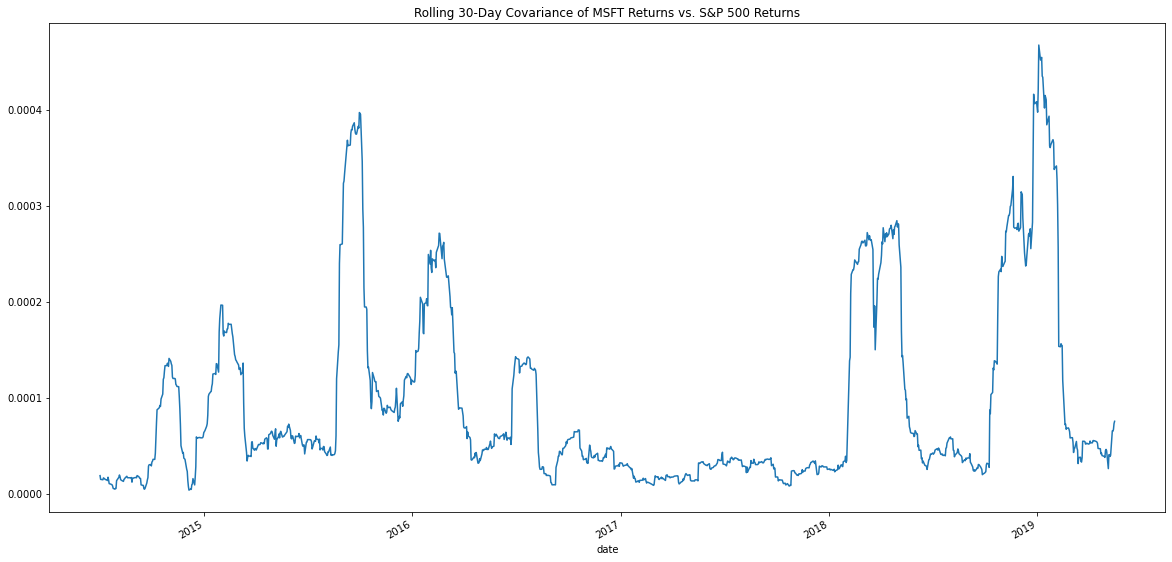

In [20]:
rolling_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of MSFT Returns vs. S&P 500 Returns') 

<AxesSubplot:title={'center':'Rolling 30-Day Variance of S&P 500 Returns'}, xlabel='date'>

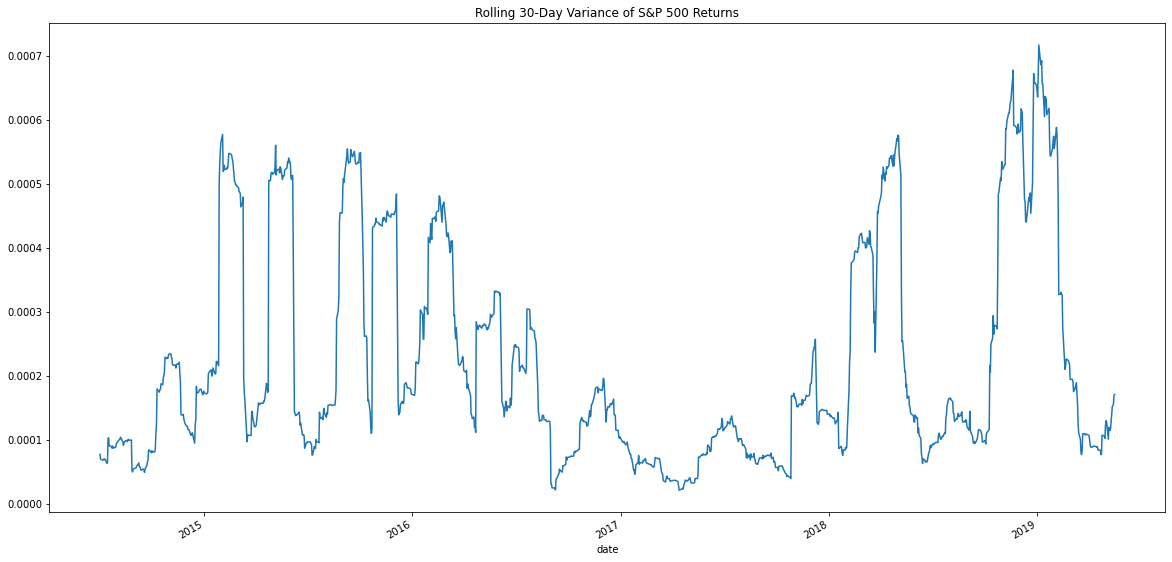

In [25]:
# Calculate 30-day rolling variance of MSFT vs. S&P 500 and plot the data

rolling_variance = daily_returns['MSFT'].rolling(window=30).var()
rolling_variance.plot(figsize=(20, 10), title='Rolling 30-Day Variance of S&P 500 Returns') 

<AxesSubplot:title={'center':'Rolling 30-Day Beta of MSFT'}, xlabel='date'>

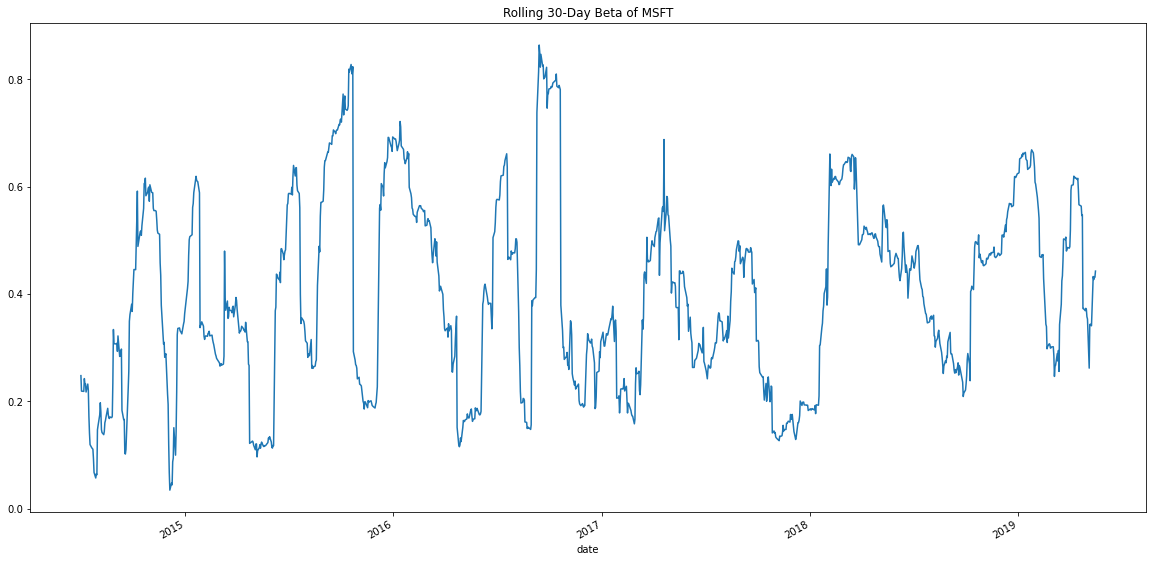

In [26]:
# Calculate 30-day rolling beta of MSFT and plot the data
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of MSFT') 

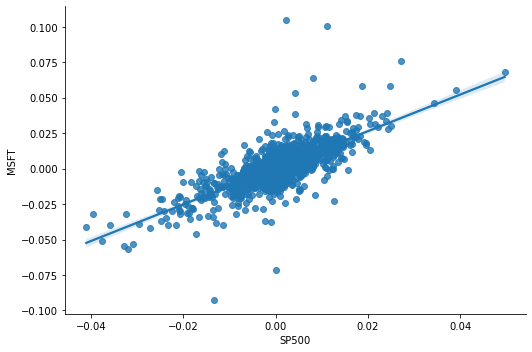

In [27]:
# Showcase beta vs. correlation by plotting a scatterplot using the seaborn library and fitting a regression line
sns.lmplot(x='SP500', y='MSFT', data=daily_returns, aspect=1.5, fit_reg=True)